In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Введение в анализ и прогнозирование [временных рядов](https://ru.wikipedia.org/wiki/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%D0%B9_%D1%80%D1%8F%D0%B4)

## Классическая постановка задачи обучения с учителем
Пусть дана обучающая выборка:
- $X^{train}$ - матрица объекты-признаки (feature matrix);
- если необходимо указать конкретный элемент матрицы, то будем использовать  обозначение $X_{o, f}^{train}$, где $o$ - индекс объекта (соответствуют строке матрицы), а $f$ - индекс признака (соответствуют столбцу матрицы);
- $Y^{train}$ - вектор целевого признака;
- если необходимо указать конкретный элемент вектора, то будем использовать  обозначение $Y_{o}^{train}$, где $o$ - индекс объекта (соответствуют индексу вектора);
- можно рассматривать $X^{train}|Y^{train}$ как блочную матрицу, количество  строк в матрице $X^{train}$ соответствует размерности вектора $Y^{train}$.

На основании алгоритма $Alg$, который использует гиперпараметры $H$, для обучающей выборки строится модель $M:X^{train} \rightarrow Y^{train}$, которая устанавливает соответствие между $X^{train}$ и $Y^{train}$: $M=Alg.fit(X^{train},Y^{train},H)$.

Также дана тестовая выборка $X^{test}$ для которой на основании найденной модели $M$  необходимо найти (предсказать) значения  $Y^{test}=Alg.predict(M, X^{test})$.

## Постановка задачи анализа временного ряда

- В случае задач классификации и регрессии объекты обучающей выборки не зависят друг от друга. В случае прогнозирования временного ряда следующие значения  зависят от предыдущих.
- В случае задачи прогнозирования временного ряда используется понятие шкалы времени $T={t_1, t_2, ... t_i ... t_n}$, где $t_i$ - значение (метка) на шкале времени.
- Между соседними метками времени всегда располагаются одинаковые временные интервалы: $t_2-t_1 = t_i - t_{i-1} = t_n - t_{n-1} = const$. Если в исходном датасете это уловие не выполняется, то он требует предобработки, в результате предобработки условие должно выполняться.
- Иногда для удобства временную шкалу рассматривают как последовательность целых чисел $T'={1, 2, ... i ... n}$, каждое целое число обозначает временной интервал (секунда, минута, час, день и т.д.) Чтобы перейти от шкалы $T'$ к шкале $T$ необходимо количество временных интервалов прибавить к базовому значению времени $T'_0$, таким образом $t_i = T'_0 + i$.
- Каждому значению метки времени $t_i$ соответствует значение временного ряда $y(t_i)$. Таким образом, временной ряд можно представить в виде табличной функции:

| Метки времени | Значения временного ряда |
| --- | --- |
| $t_1$ | $y_1$ |
| $t_2$ | $y_2$ |
| ... | ... |
| $t_i$ | $y_i$ |
| ... | ... |
| $t_n$ | $y_n$ |

- Предыдущие (исторические) значения принято называть лагами (lags). Первый лаг (лаг первого порядка): $lag1(y_i) = y_{i-1}$. Второй лаг (лаг второго порядка): $lag2(y_i) = y_{i-2}$.
- При анализе временного ряда выделяют три составляющие: тренд, сезонность и шум. 
    - Тренд - это тенденция, направление временного ряда.
    - Сезонность показывает влияние периодичности (день недели, время года и т.д.), фактически определяет "колебание" временного ряда вокруг тренда.
    - Шум - это случайная составляющая ряда.
- Для выделения составляющих ряда может быть использована функция [seasonal_decompose](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) из библиотеки statsmodels. Существуют две модели выделения составляющих ряда:
    - Аддитивная $y(t) = Tr(t) + S(t) + \epsilon(t)$ (применяется наиболее часто)
    - Мультипликативная $y(t) = Tr(t) \cdot S(t) \cdot \epsilon(t)$
    - где $Tr(t)$ - составляющая тренда; $S(t)$ - составляющая сезонности; $\epsilon(t)$ - шум.
- Очень важными понятиями временного ряда являются понятия **стационарности** и **нестационарности**.
- **Стационарным** называется временной ряд, среднее значение которого не изменяется во времени, то есть стационарный временной ряд не имеет тренда. Иначеряд является нестационарным.


## Постановка задачи прогнозирования временного ряда

- Задача прогнозирования временного ряда может быть сформулирована как поиск модели $M$:
    - Входными данными модели, на которых она обучается, являются известные  значения временного ряда $y_1 ... y_{i-1}$. 
    - Также на вход модели могут поступать гиперпараметры $H$.
    - Выходными данными модели являются прогнозируемые значения временного ряда $y_i ... y_{i+k}$, где $k$ - горизонт прогноза. 
- Существует вариант постановки задачи, в которой значение $y_i$ зависит не только от предыдущих значений $y$, но и от матрицы $X$, но такую постановку мы детально не рассматриваем.
- **Горизонт прогноза** - это количество временных интервалов, на глубину которых выполняется прогноз. Как правило, составляет не более 1/3 от длины временного ряда. С точки зрения горизонта прогноза, прогнозы делятся на:
    - краткосрочные;
    - среднесрочные;
    - долгосрочные.
- Метриками оценки качеcтва прогнозирования обычно являются регрессионные метрики (MAE, MSE, ...).


## Возможности библиотеки [Pandas](https://pandas.pydata.org/docs/index.html) для работы с [временными рядами](https://pandas.pydata.org/docs/user_guide/timeseries.html)

Библиотека Pandas содержит развитые возможности для работы с временными рядами. В частности, поддерживаются индексы DatetimeIndex, которые позволяют задавать индекс датасета в виде поля типа метки даты-времени.

In [2]:
# Параметр squeeze=True загружает набор данных в ивде объекта Series
fb1 = pd.read_csv('data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)

In [3]:
fb1.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

In [4]:
ts_fb = pd.read_csv('data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True)
ts_ms = pd.read_csv('data/monthly-sunspots.csv', header=0, index_col=0, parse_dates=True)

In [5]:
ts_fb.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [6]:
# Размер временного ряда
ts_fb.shape

(365, 1)

In [7]:
# Фильтр на январь 1959 года
ts_fb['Births']['1959-01']

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64

In [8]:
ts_ms.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


## Визуализация временных рядов

- [Статья с примерами.](https://machinelearningmastery.com/time-series-data-visualization-with-python/)

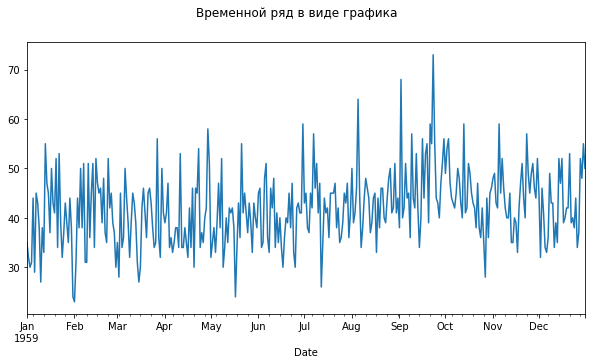

In [9]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
ts_fb.plot(ax=ax, legend=False)
pyplot.show()

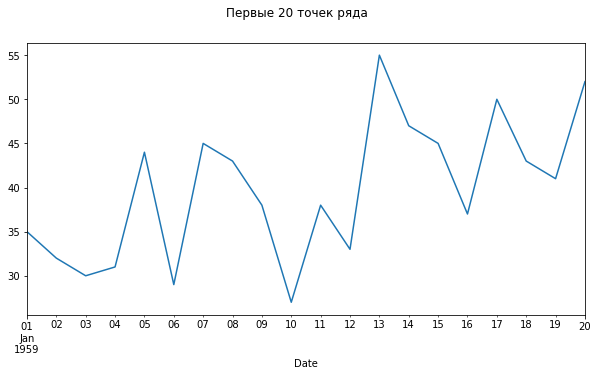

In [10]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Первые 20 точек ряда')
ts_fb[:20].plot(ax=ax, legend=False)
pyplot.show()

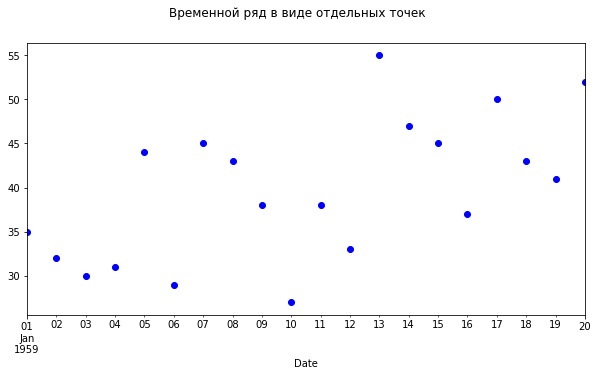

In [11]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде отдельных точек')
ts_fb[:20].plot(ax=ax, legend=False, style='bo')
pyplot.show()

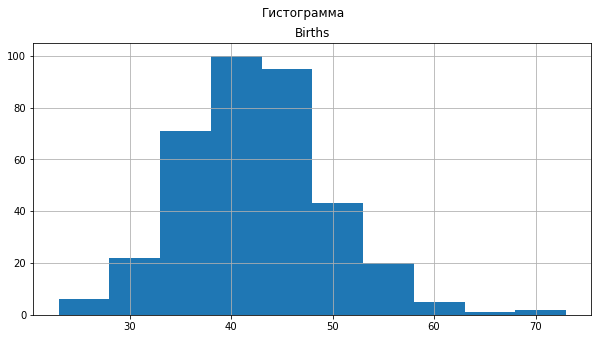

In [12]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Гистограмма')
ts_fb.hist(ax=ax, legend=False)
pyplot.show()

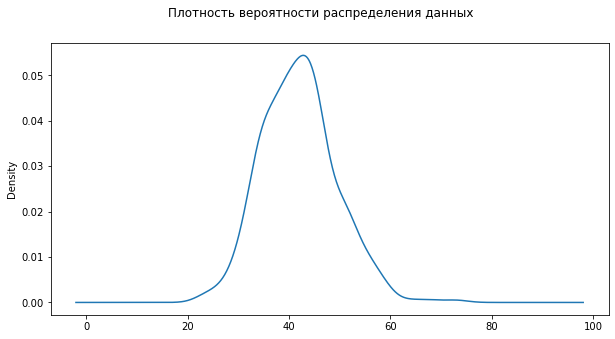

In [13]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
ts_fb.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

### [Lag Plots](https://www.geeksforgeeks.org/lag-plots/)

- Диаграмма позволяет понять автокорреляцию в данных временного ряда. Может рассматриваться (хотя это весьма грубое сравнение) как аналог корреляционной матрицы для временного ряда.
- По оси абсцисс откладывается значение временного ряда.
- По оси ординат для каждой точки откладывается ее лаг порядка $i$, где $i$ - параметр, задаваемый пользователем.

Интерпретация графика:
- Если облако точек направлено из левого нижнего угла в правый верхний, то имеет место положительная автокорреляция.
- Если облако точек направлено из левого верхнего угла в правый нижний, то имеет место отрицательная автокорреляция.
- Любой из вариантов говорит о том, что автокорреляционные методы прогнозирования хорошо применимы к данному ряду.

Автокорреляционная диаграмма строит зависимость автокорреляции от лагов.

#### Пример применения Lag Plot и автокорреляционной диаграммы

Можно сделать вывод, что автокорреляция достаточно слабая.

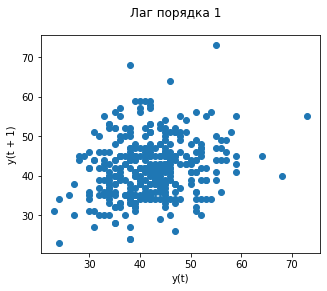

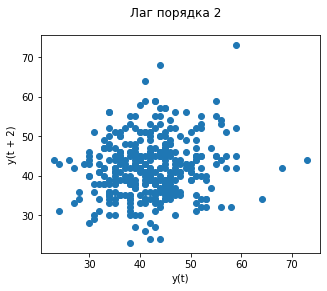

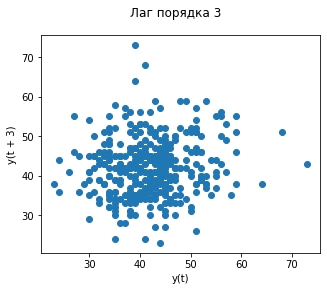

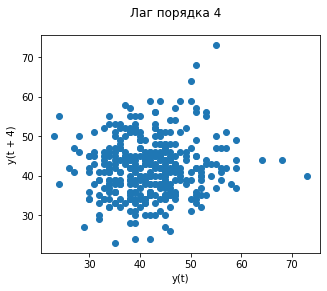

In [14]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(ts_fb, lag=i, ax=ax)
    pyplot.show()

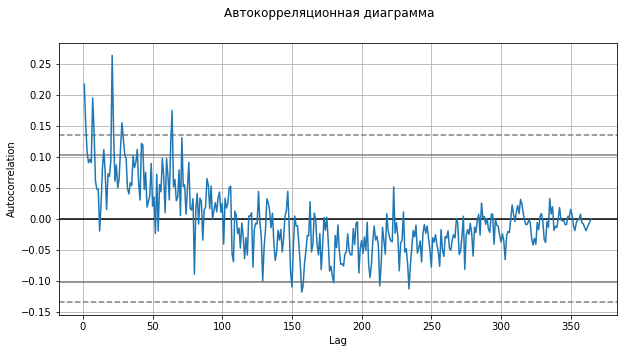

In [15]:
# По оси Y откладывается ковариация 
# https://stats.stackexchange.com/questions/357300/what-does-pandas-autocorrelation-graph-show
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(ts_fb, ax=ax)
pyplot.show()

### [Автокорреляционная функция](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F) 

Показывает зависимость коэффициента корреляции от лага, то есть корреляцию между исходным временным рядом и временным рядом,сдвинутым на заданный лаг.

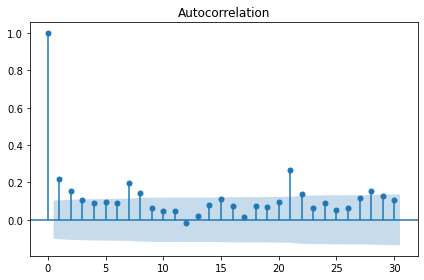

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_fb, lags=30)
plt.tight_layout()

### [Частичная автокорреляционная функция](https://en.wikipedia.org/wiki/Partial_autocorrelation_function)

Находит корреляцию остатков, которые остается после удаления эффектов, объясняемых более ранними лагами.

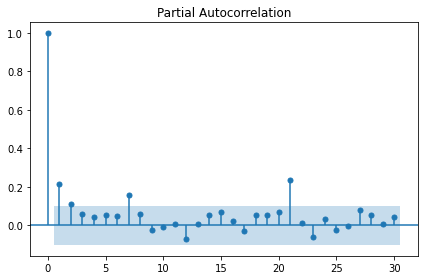

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ts_fb, lags=30)
plt.tight_layout()

## [Декомпозиция временного ряда](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) с помощью библиотеки statsmodels

In [18]:
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
from statsmodels.tsa.seasonal import seasonal_decompose
# Аддитивная модель
def plot_decompose(data=ts_fb['Births'], model='add'):
    result_add = seasonal_decompose(data, model = 'add')
    fig = result_add.plot()
    fig.set_size_inches((10, 8))
    # Перерисовка
    fig.tight_layout()
    plt.show()

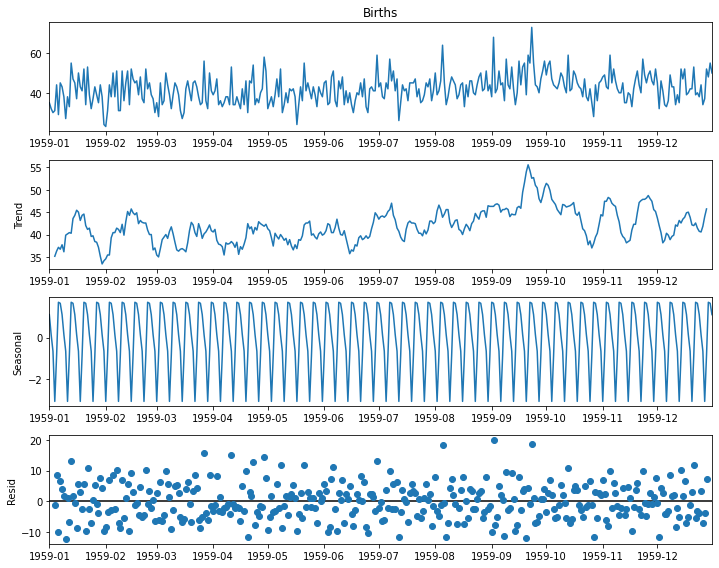

In [19]:
plot_decompose(data=ts_fb['Births'], model='add')

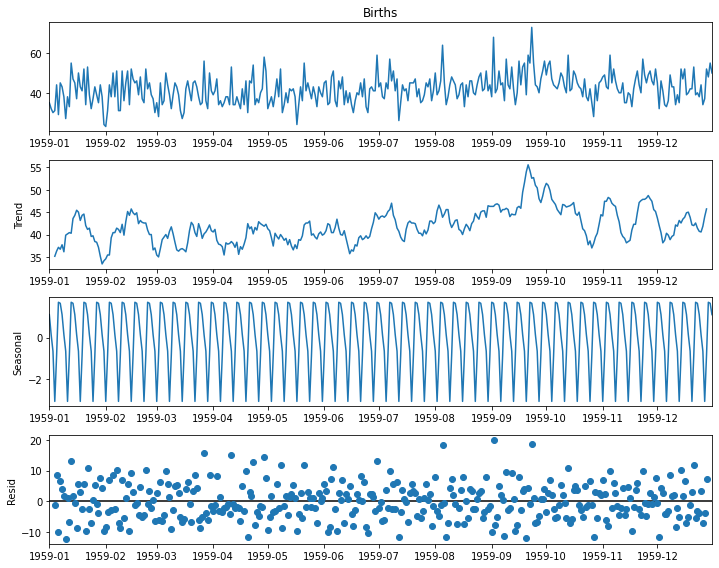

In [20]:
plot_decompose(data=ts_fb['Births'], model='mul')

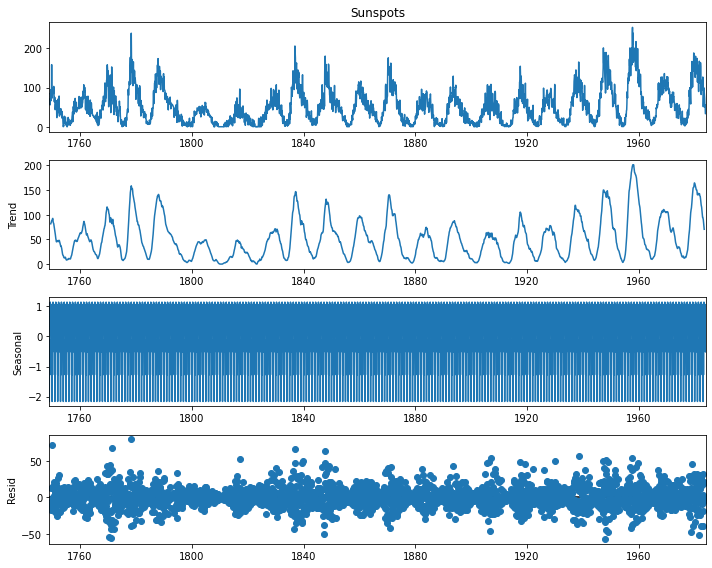

In [21]:
plot_decompose(data=ts_ms['Sunspots'], model='add')

## [Скользящая средняя](https://ru.wikipedia.org/wiki/%D0%A1%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B0%D1%8F_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D1%8F%D1%8F)

- Показывает среднее значение ряда, но не является алгоритмом предсказания.

In [22]:
ts_fb2 = ts_fb.copy()

In [23]:
# Простое скользящее среднее (SMA)
ts_fb2['SMA_10'] = ts_fb2['Births'].rolling(10, min_periods=1).mean()
ts_fb2['SMA_20'] = ts_fb2['Births'].rolling(20, min_periods=1).mean()

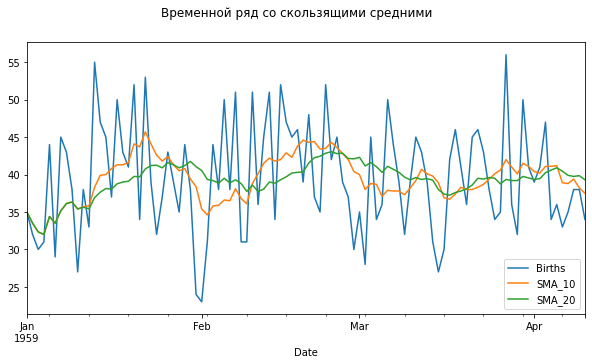

In [24]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд со скользящими средними')
ts_fb2[:100].plot(ax=ax, legend=True)
pyplot.show()

## Прогнозирование временного ряда авторегрессионными методами

- Методы прогнозирования
    - [Модель ARMA](https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%B0%D0%B2%D1%82%D0%BE%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%E2%80%94_%D1%81%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B5%D0%B3%D0%BE_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B3%D0%BE)
    - [Модель ARIMA](https://ru.wikipedia.org/wiki/ARIMA)
    - [Модель Хольта-Винтера](https://www.helenkapatsa.ru/modiel-kholta-vintiersa/)

- Реализация методов прогнозирования
    - [Статья с примерами прогнозирования на Python](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/)
    - [Подбор гиперпараметров для модели ARIMA](https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/)

In [25]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [26]:
# Целочисленная метка шкалы времени 
xnum = list(range(ts_fb2.shape[0]))
# Разделение выборки на обучающую и тестовую
Y = ts_fb2['Births'].values
train_size = int(len(Y) * 0.7)
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]
history_arima = [x for x in train]
history_es = [x for x in train]

In [27]:
# Параметры модели (p,d,q) 
arima_order = (6,1,0)
# Формирование предсказаний
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])
# Вычисление метрики RMSE
error_arima = mean_squared_error(test, predictions_arima, squared=False)

In [28]:
# Формирование предсказаний
predictions_es = list()
for t in range(len(test)):
    model_es = ExponentialSmoothing(history_es)
    model_es_fit = model_es.fit()
    yhat_es = model_es_fit.forecast()[0]
    predictions_es.append(yhat_es)
    history_es.append(test[t])
# Вычисление метрики RMSE
error_es = mean_squared_error(test, predictions_es, squared=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [29]:
# Ошибка прогноза
np.mean(Y), error_arima, error_es

(41.98082191780822, 7.082306245945257, 7.2170186915417105)

In [30]:
# Записываем предсказания в DataFrame
ts_fb2['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)
ts_fb2['predictions_HWES'] = (train_size * [np.NAN]) + list(predictions_es)

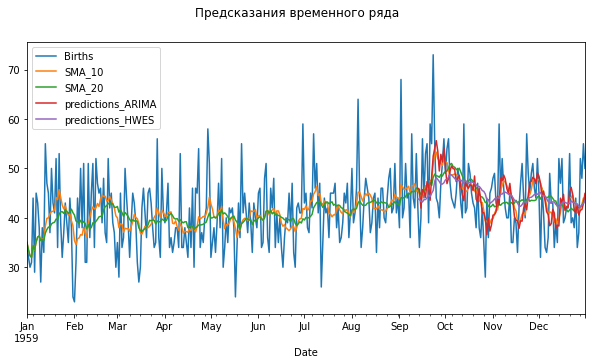

In [31]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда')
ts_fb2.plot(ax=ax, legend=True)
pyplot.show()

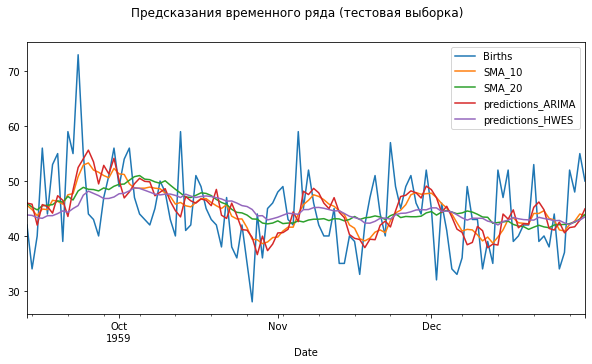

In [32]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
ts_fb2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

Вывод. Предсказания ARIMA и HWES близки к скользящему среднему.

## Прогнозирование временного ряда методом [символьной регресии](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BC%D0%B2%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F)

Для реализации используется библиотека [gplearn.](https://gplearn.readthedocs.io/en/stable/)

[Пример использования gplearn для временных рядов.](https://towardsdatascience.com/unit-4-genetic-programming-d80cd12c454f)

In [33]:
from gplearn.genetic import SymbolicRegressor

In [34]:
function_set = ['add', 'sub', 'mul', 'div', 'sin']
est_gp = SymbolicRegressor(population_size=500, metric='mse',
                               generations=70, stopping_criteria=0.01,
                               init_depth=(4, 10), verbose=1, function_set=function_set,
                               const_range=(-100, 100), random_state=0)

In [35]:
est_gp.fit(np.array(xnum_train).reshape(-1, 1), train.reshape(-1, 1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   263.65      7.25395e+55       26           368.24              N/A      2.35m
   1   168.80      3.08763e+11      190          137.664              N/A      1.01m
   2   187.17      1.23463e+10      190           137.64              N/A      1.07m
   3   126.69      3.36087e+22       14          63.3652              N/A     48.97s
   4   178.60      6.78824e+13       14          63.3685              N/A     59.38s
   5   123.38      1.01443e+14       10          58.1649              N/A     43.66s
   6    16.83        3.043e+14       25          57.1643              N/A     19.85s
   7    13.11      4.06308e+14        9          50.0916              N/A     21.58s
   8    15.99      4.05734e+14       22          50.0506              N/A  

SymbolicRegressor(const_range=(-100, 100),
                  function_set=['add', 'sub', 'mul', 'div', 'sin'],
                  generations=70, init_depth=(4, 10), metric='mse',
                  population_size=500, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [36]:
print(est_gp._program)

sub(37.158, add(add(add(add(add(add(add(add(add(add(add(add(add(div(-82.002, 22.914), sin(sin(sin(sub(37.158, add(add(add(add(add(div(-82.002, 22.914), sin(sin(div(mul(X0, -11.576), sin(div(X0, sub(sin(add(24.123, -11.354)), add(div(-82.002, 22.914), div(mul(X0, -11.576), add(add(div(-82.002, 22.914), div(sub(37.158, add(add(-13.258, sin(div(-82.002, 22.914))), add(sub(X0, -42.031), add(-13.258, sin(sin(mul(X0, -11.576))))))), add(sub(X0, -42.031), add(-13.258, sin(22.914))))), add(-13.258, sin(add(-42.031, X0))))))))))))), sin(div(mul(X0, -11.576), sin(div(X0, sub(sin(sin(add(24.123, -11.354))), sin(add(-42.031, X0)))))))), sin(mul(X0, -11.576))), sin(div(mul(X0, -11.576), sin(div(X0, sub(sin(sin(add(24.123, -11.354))), add(div(-82.002, 22.914), div(mul(X0, -11.576), add(div(X0, sub(sin(add(24.123, -11.354)), add(div(-82.002, 22.914), div(mul(X0, -11.576), add(add(div(-82.002, 22.914), div(sub(37.158, add(add(-13.258, sin(div(-82.002, 22.914))), add(sub(X0, -42.031), sin(sin(add(24.12

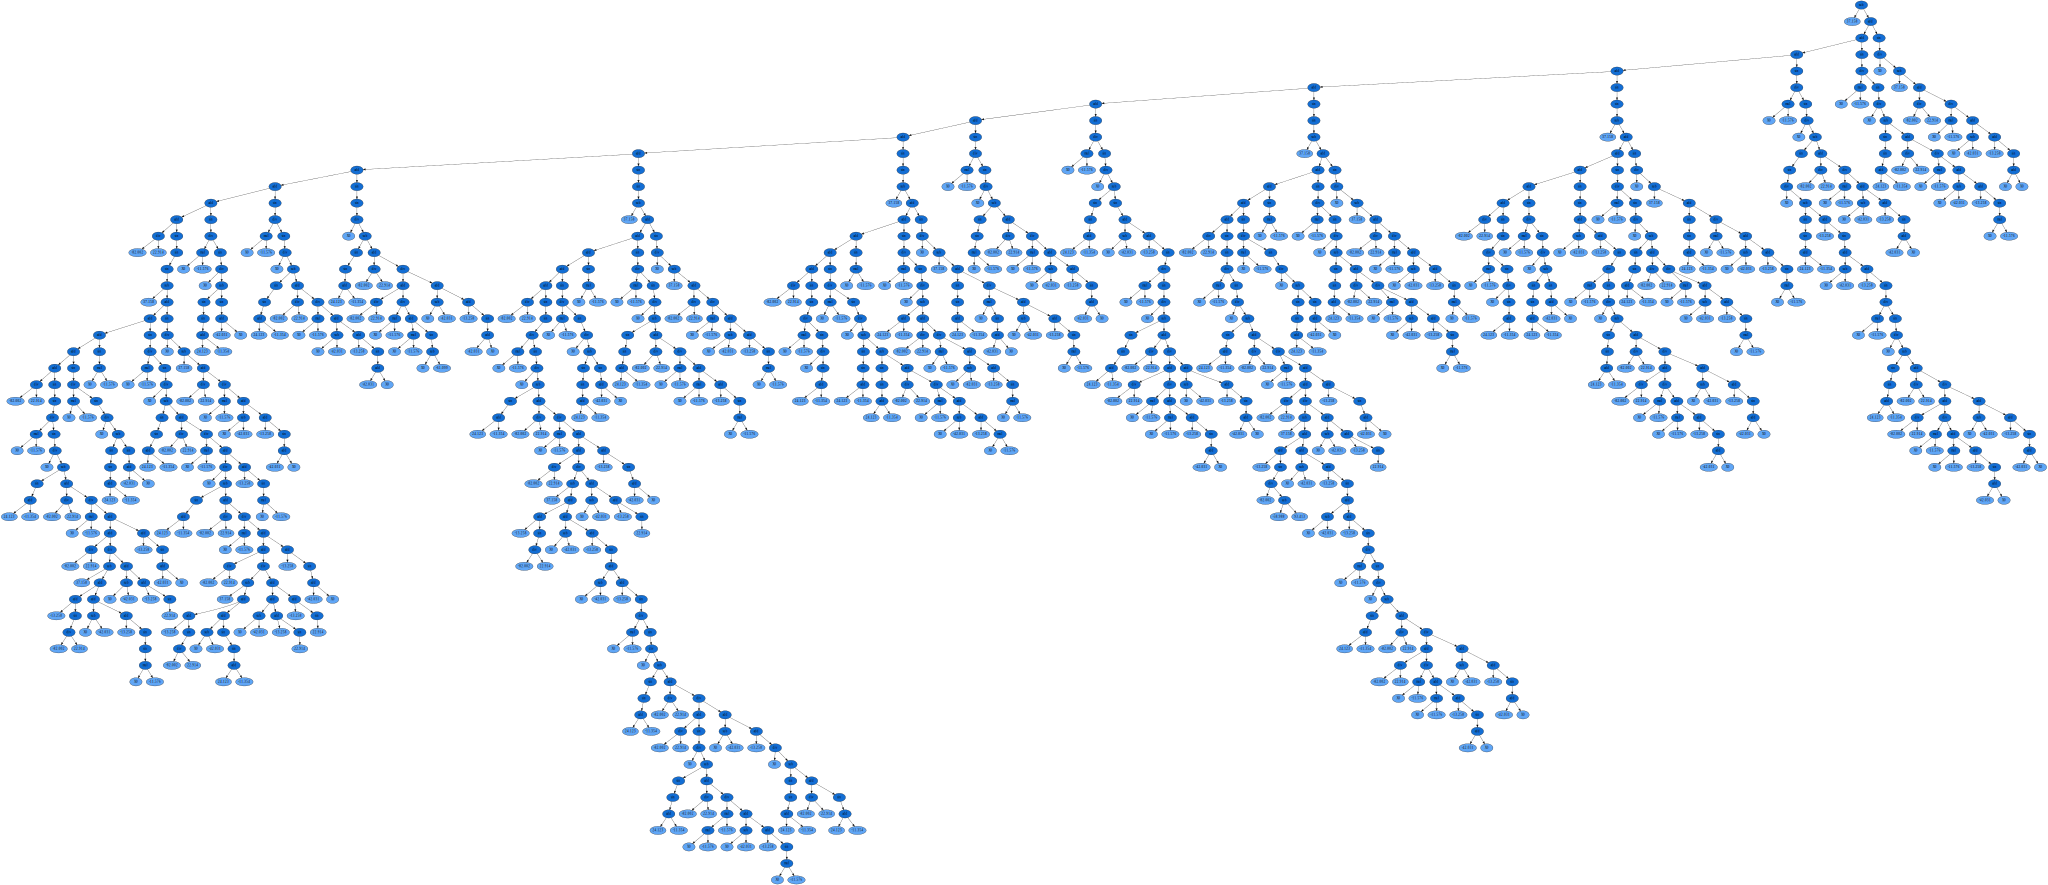

In [37]:
import graphviz
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

In [38]:
# Предсказания
y_gp = est_gp.predict(np.array(xnum_test).reshape(-1, 1))
y_gp[:10]

array([40.28938386, 36.55290694, 44.0910671 , 42.43899561, 47.00219962,
       45.03593076, 39.69664985, 46.57498875, 44.92532119, 43.89997191])

In [39]:
# Записываем предсказания в DataFrame
ts_fb2['predictions_GPLEARN'] = (train_size * [np.NAN]) + list(y_gp)

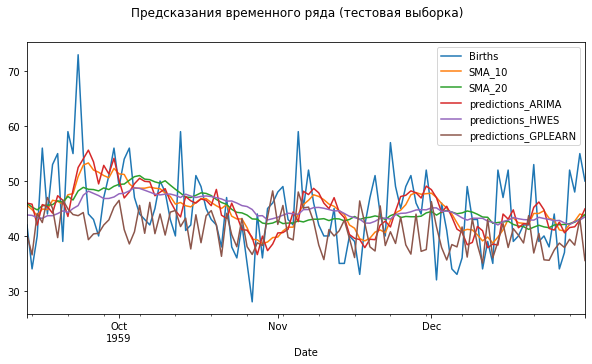

In [40]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
ts_fb2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

## Прогнозирование временного ряда с использованием рекуррентных нейронных сетей

- [Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)
- [Прогнозирование временных рядов с использованием TensorFlow](https://www.tensorflow.org/tutorials/structured_data/time_series)
- [ARIMA vs Prophet vs LSTM for Time Series Prediction](https://neptune.ai/blog/arima-vs-prophet-vs-lstm)
- [3- Time Series Forecasting Using LSTM](https://medium.com/analytics-vidhya/3-time-series-forecasting-using-lstm-e14b93f4ec7c)

## Дополнительные источники:
- [Анализ временных рядов.](https://k-tree.ru/articles/statistika/prognozirovanie/analiz_vremennih_ryadov)
